# Assignment 1

Importng the pacakages:

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import sklearn.cross_validation
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.model_selection import GridSearchCV

Reading the data:

In [37]:
df1 = pd.read_csv('D:/NEU/Courses/BDIA/Assignments/Assignment 1/Data/Forbes Top 2000/Forbes Top2000 2017.csv')
df1.reset_index(drop = True, inplace = True)
df1.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


## Data Cleaning:
Search for Missing Values:

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 Rank           2000 non-null int64
Company         2000 non-null object
Country         2000 non-null object
Sales           2000 non-null float64
Profits         2000 non-null float64
Assets          2000 non-null float64
Market Value    2000 non-null float64
Sector          1803 non-null object
Industry        1509 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 140.7+ KB


In [39]:
df1.isnull().sum()

 Rank             0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

Dropping null value rows:

In [40]:
df = df1.dropna()
df

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Major Banks
1,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Major Banks
4,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Major Banks
5,6,Agricultural Bank of China,China,115.700,27.800,2816.0,149.200,Financials,Regional Banks
6,7,Bank of America,United States,92.200,16.600,2196.8,231.900,Financials,Major Banks
7,8,Bank of China,China,113.100,24.900,2611.5,141.300,Financials,Major Banks
8,9,Apple,United States,217.500,45.200,331.1,752.000,Information Technology,Computer Hardware
9,10,Toyota Motor,Japan,249.900,17.100,412.5,171.900,Consumer Discretionary,Auto & Truck Manufacturers


No inappropriate values as of such

No false data detected and I have removed the null values.

### How is the data distributed?

Summary Statistics:

In [41]:
df.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000


In [42]:
df.Company

0                               ICBC
1            China Construction Bank
2                 Berkshire Hathaway
3                     JPMorgan Chase
4                        Wells Fargo
5         Agricultural Bank of China
6                    Bank of America
7                      Bank of China
8                              Apple
9                       Toyota Motor
10                              AT&T
11                         Citigroup
13                  General Electric
14               Samsung Electronics
15           Ping An Insurance Group
16                   Wal-Mart Stores
17            Verizon Communications
18                         Microsoft
19                 Royal Dutch Shell
20                           Allianz
21                      China Mobile
22                       BNP Paribas
25                             Total
26                         AXA Group
27                           Daimler
28                  Volkswagen Group
29          Mitsubishi UFJ Financial
3

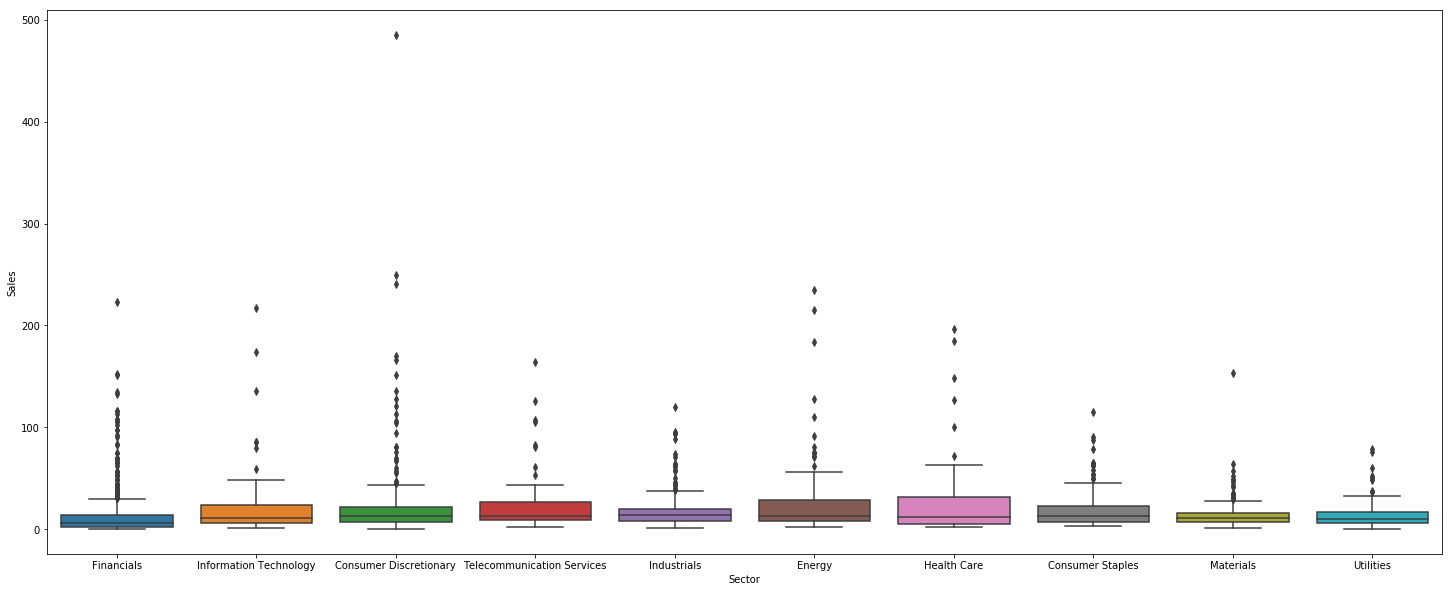

In [43]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.boxplot(x = "Sector", y = "Sales", data = df, ax = ax)

The above boxplot shows a visual represtation of the summary statistics and from it we can conculde that there are many outliers in the data specifically in each and every sector of the industry.

### Plotting each column:

Sales:

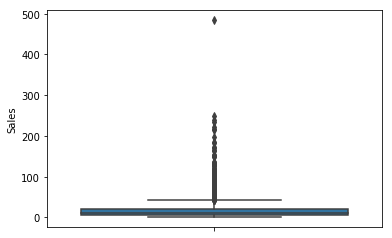

In [44]:
sns.boxplot(y=df["Sales"])

The above boxplot of the "Sales" column shows me that there a lot of variety of sale prices, many of them are counted as outliers here as those values are outside the inter quantile range. The boxplot shows that sales of many companies lie between 2 billion dollars to around 50 billion dollars.

Profits:

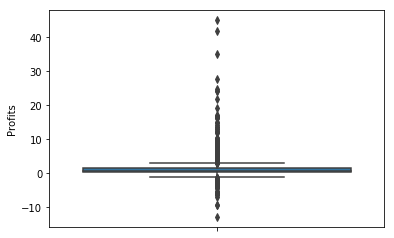

In [45]:
sns.boxplot(y=df["Profits"])

The "Profits" boxplot shows me that the interquantile range is a very small one as a result there are many outliers, postive ones and the negative ones. All companies in the data haven't experienced profits in the 2017. There are many companes from the dataset that have experienced losses in billions. On the other hand there have been companies that have profits on a whole new level with highest profit being around $45B.

Assets:

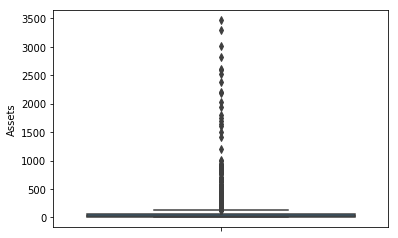

In [46]:
sns.boxplot(y=df["Assets"])

Again here I have a tiny boxplot with a small interquantile range and an almost invisible minimum. Majority of the data points here are outliers which convey that different companies have varying assets probably depending upon the rank of the company and how well established it is.

Market Value:

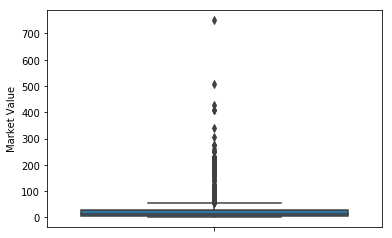

In [47]:
sns.boxplot(y=df["Market Value"])

The interquantile range lies approximately from $10B to $50B with the maximum being around $70 billion. There are a lot of outliers specially in the $70B - $350B region. The highest market value among all the companies in the dataset is of Apple which values at $752B.

Sector:

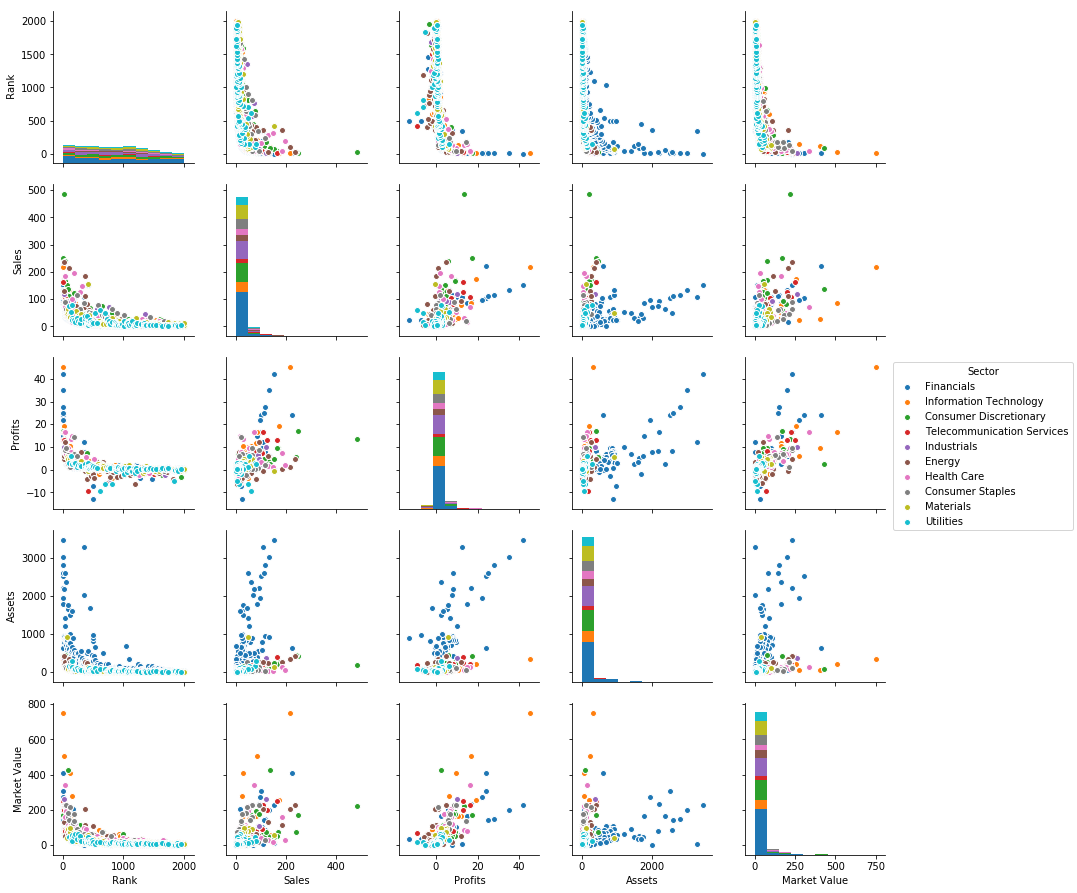

In [48]:
sns.pairplot(df, hue="Sector")

## Exploratory Data Analysis:

Strip Plot:

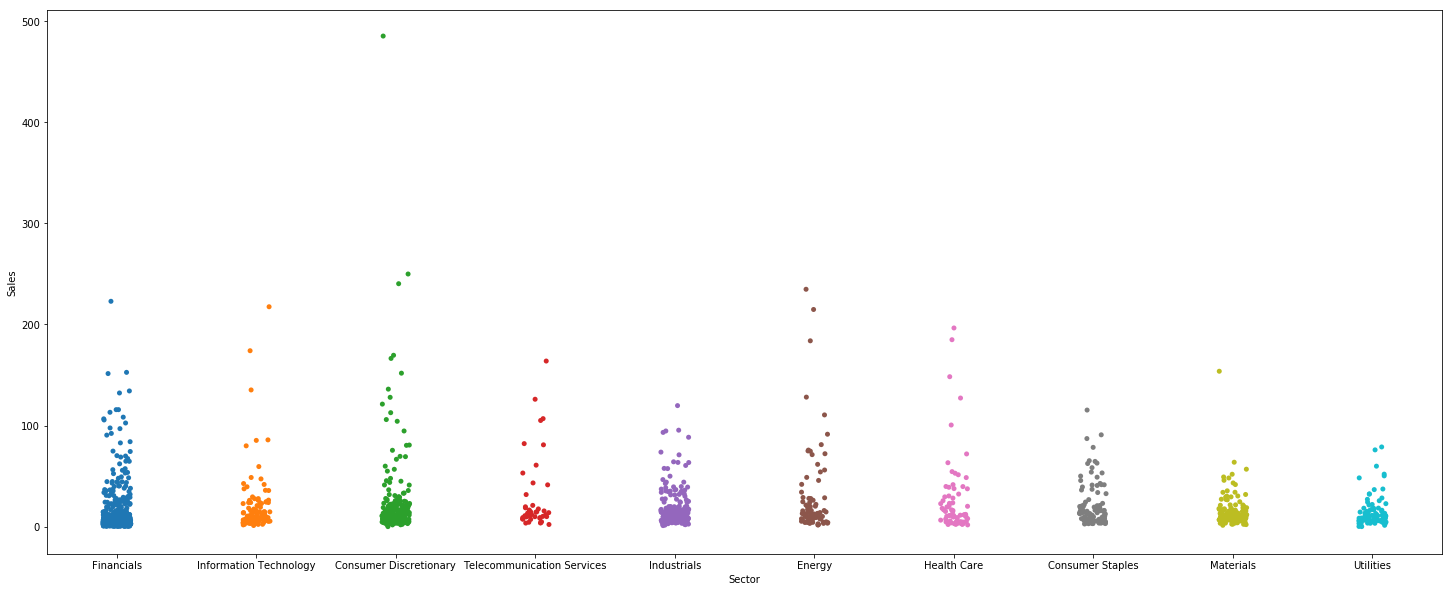

In [49]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.stripplot(x = "Sector", y = "Sales", data = df, ax = ax, jitter = True)

Bar Plot of Sector vs Sales:

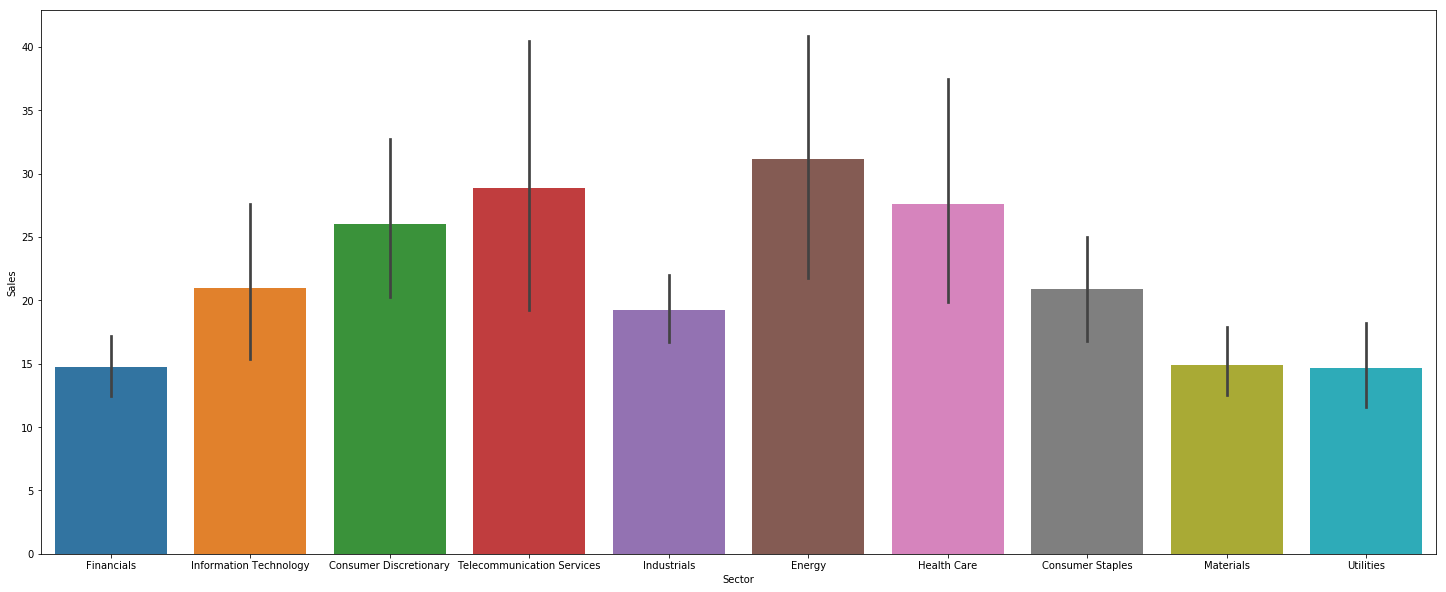

In [50]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.barplot(x = "Sector", y = "Sales", data = df, ax = ax)

In [ ]:
df.corr()

Bar plot of Sector Count:

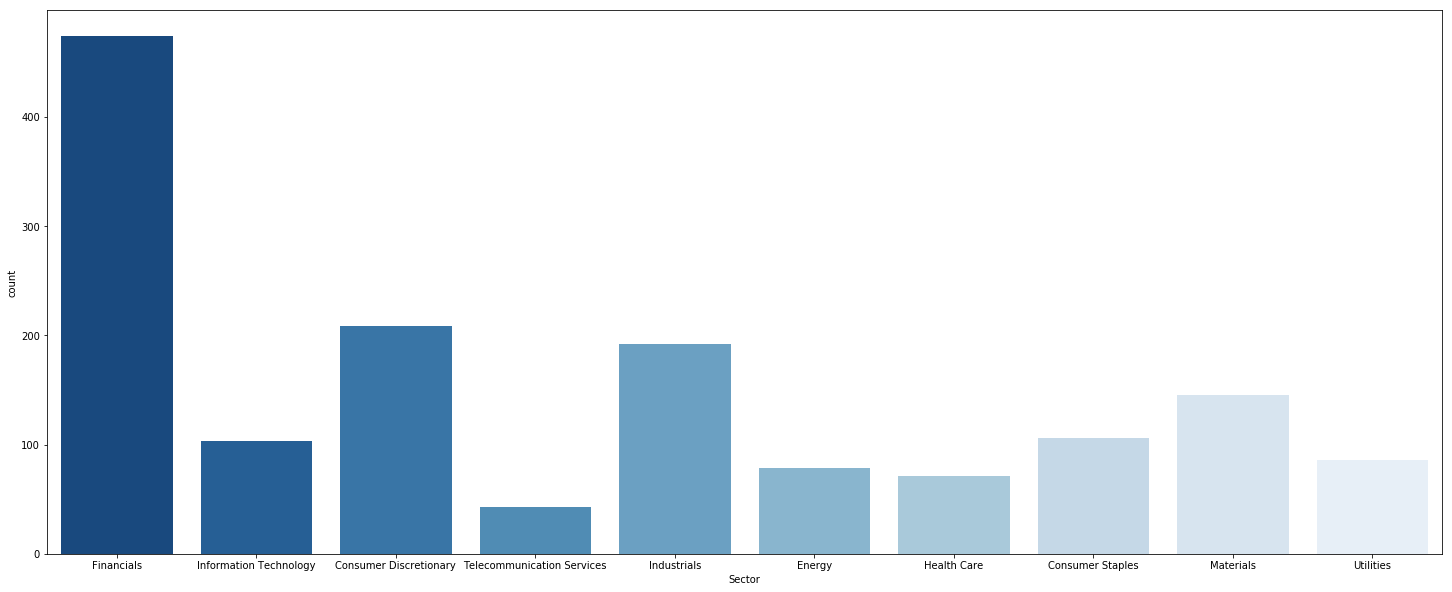

In [51]:
new_size = (25, 10)
fig, ax = plt.subplots(figsize = new_size)
sns.countplot(x = "Sector", data = df, ax = ax, palette="Blues_r")

## Part B:

### Linear Regression:

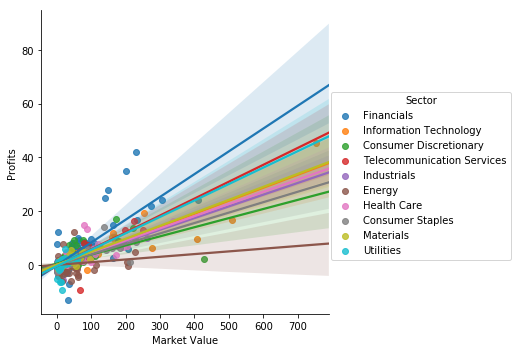

In [52]:
sns.lmplot(x = 'Market Value', y = 'Profits', data = df, hue = "Sector")

#### Using sklearn:

I have decided to choose Market Value and Profits in line of the thinking that Profits of a particualr company can be predicted if the Market value of the company is reasonalbe at par with the profits. A company which may have a high market value may have a high profits and vice versa. It is also possible that the company may have a high market value because of the high profit it earns. Although it is not always true.

In [53]:
X = df[["Market Value"]]
y = df[["Profits"]]

#Fitting the model

lr = linear_model.LinearRegression()
results = lr.fit(X,y)

#print the coefficients

print(results.intercept_, results.coef_)

[0.02285256] [[0.05132154]]


In [54]:
lr.score(X,y) #R square value

0.5551586351190461

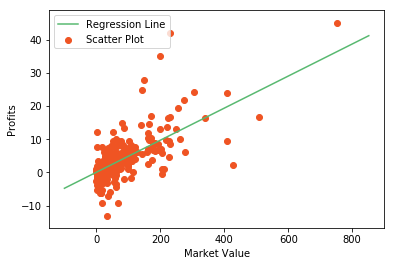

In [55]:
# Plotting Values and Regression Line
X2 = df['Market Value']
Y2 = df['Profits']

max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y3 = 0.06051781 + 0.04833329 * x

# Ploting Line
plt.plot(x, y3, color='#58b970', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X2, Y2, c='#ef5423', label='Scatter Plot')

plt.xlabel('Market Value')
plt.ylabel('Profits')
plt.legend()
plt.show()

The above diagram shows a rergression line for profits vs market value.

#### Using statsmodel:

In [56]:
import statsmodels.api as sm

lrs = sm.OLS(y,X)
results = lrs.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Profits   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     2518.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):          9.88e-324
Time:                        18:37:21   Log-Likelihood:                -3303.3
No. Observations:                1508   AIC:                             6609.
Df Residuals:                    1507   BIC:                             6614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Market Value     0.0515      0.001     50.184      0.000       0.050       0.054
==============================================================================
Omnibus:                     1142.526   Durbin-Watson:                   1.310
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           185440.136
Skew:                           2.637   Prob(JB):                         0.00
Kurtosis:                      57.069   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
print('Parameters:', results.params)
print('R2:', results.rsquared)

Parameters: Market Value    0.051531
dtype: float64
R2: 0.6256278685381469


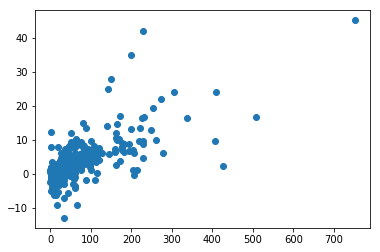

In [58]:
X = df[["Market Value"]]
y = df[["Profits"]]
plt.plot(X, y, "o")

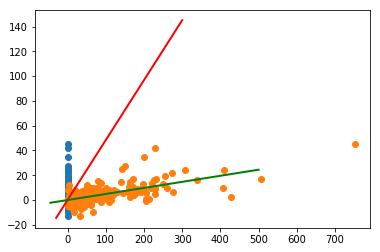

In [59]:
#We need an intercept here so lets find one
X = sm.add_constant(X) #  Our model needs an intercept so we add a column of 1s:
plt.plot(X, y, "o")
x2 = np.linspace(-30, 300, 10)
y2 = 0.0605 + (0.4833*x2)
plt.plot(x2, y2, lw=2, color="r")
x2 = np.linspace(-45, 500, 3)
y2 = (0.048902*x2)
plt.plot(x2, y2, lw=2, color="g")
plt.show()

In [60]:
lrs = sm.OLS(y, X)
results = lrs.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Profits   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     1879.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):          3.46e-267
Time:                        18:37:21   Log-Likelihood:                -3303.2
No. Observations:                1508   AIC:                             6610.
Df Residuals:                    1506   BIC:                             6621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0229      0.064      0.356      0.722      -0.103       0.149
Market Value     0.0513      0.001     43.353      0.000       0.049       0.054
==============================================================================
Omnibus:                     1151.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186483.651
Skew:                           2.674   Prob(JB):                         0.00
Kurtosis:                      57.215   Cond. No.                         62.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const           0.022853
Market Value    0.051322
dtype: float64
R2:  0.5551586351190462


### Logistic Regression:

In [62]:
df['Sector_Values'] = df['Sector']
df = df[['Company', 'Country', 'Sales','Profits','Assets', 'Market Value', 'Sector', 'Sector_Values', 'Industry']]
df

C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Company,Country,Sales,Profits,Assets,Market Value,Sector,Sector_Values,Industry
0,ICBC,China,151.400,42.000,3473.2,229.800,Financials,Financials,Major Banks
1,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,Financials,Regional Banks
2,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,Financials,Investment Services
3,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,Financials,Major Banks
4,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,Financials,Major Banks
5,Agricultural Bank of China,China,115.700,27.800,2816.0,149.200,Financials,Financials,Regional Banks
6,Bank of America,United States,92.200,16.600,2196.8,231.900,Financials,Financials,Major Banks
7,Bank of China,China,113.100,24.900,2611.5,141.300,Financials,Financials,Major Banks
8,Apple,United States,217.500,45.200,331.1,752.000,Information Technology,Information Technology,Computer Hardware
9,Toyota Motor,Japan,249.900,17.100,412.5,171.900,Consumer Discretionary,Consumer Discretionary,Auto & Truck Manufacturers


In [63]:
df.Sector_Values = df.Sector_Values.replace({"Financials": 1, "Information Technology": 2, "Consumer Discretionary": 3, "Telecommunication Services": 4,"Energy": 5,"Health Care": 6,"Materials": 7,"Consumer Staples": 8, "Industrials": 9, "Utilities": 10})
df

C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Company,Country,Sales,Profits,Assets,Market Value,Sector,Sector_Values,Industry
0,ICBC,China,151.400,42.000,3473.2,229.800,Financials,1,Major Banks
1,China Construction Bank,China,134.200,35.000,3016.6,200.500,Financials,1,Regional Banks
2,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,Financials,1,Investment Services
3,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,Financials,1,Major Banks
4,Wells Fargo,United States,97.600,21.900,1943.4,274.400,Financials,1,Major Banks
5,Agricultural Bank of China,China,115.700,27.800,2816.0,149.200,Financials,1,Regional Banks
6,Bank of America,United States,92.200,16.600,2196.8,231.900,Financials,1,Major Banks
7,Bank of China,China,113.100,24.900,2611.5,141.300,Financials,1,Major Banks
8,Apple,United States,217.500,45.200,331.1,752.000,Information Technology,2,Computer Hardware
9,Toyota Motor,Japan,249.900,17.100,412.5,171.900,Consumer Discretionary,3,Auto & Truck Manufacturers


In [64]:
df.shape

(1508, 9)

In [67]:
train, test = train_test_split(df, test_size = 0.30)
print(train.shape)
print(test.shape)

(1055, 9)
(453, 9)


In [68]:
train_X = train[['Sales','Assets', 'Profits', 'Market Value']]
train_y = train.Sector_Values
test_X = test[['Sales','Assets', 'Profits', 'Market Value']]
test_y = test.Sector_Values

In [78]:
lor = LogisticRegression()
lor.fit(train_X,train_y)
prediction = lor.predict(test_X)
print('The accuracy of Logistic Regression using scikit-learn is',metrics.accuracy_score(prediction,test_y))

The accuracy of Logistic Regression using scikit-learn is 0.46357615894039733


In [70]:
lor.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [76]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
search_params={'penalty':['l1','l2'],'C':[0.001,0.01,1,10]},
grid = GridSearchCV(estimator=lor, param_grid=search_params,refit=True)
grid.fit(train_X,train_y)
print(grid.best_params_ )
print(grid.best_score_)
best_clf_lor=grid.best_estimator_

{'C': 0.01, 'penalty': 'l1'}
0.4246445497630332


In [81]:
YPrediction = lor.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y,YPrediction)
print(confusion_matrix)

[[149   1   3   0   0   0   0   0   6   0]
 [  0   2  17   0   0   0   0   0  10   0]
 [  5   1  37   0   1   0   0   0  18   0]
 [  4   0   4   0   0   0   0   0   3   0]
 [  7   0   7   0   5   0   0   0   3   0]
 [  2   6   5   0   3   0   0   0   7   0]
 [  7   0  31   0   0   0   0   0  11   0]
 [  1   6  19   0   0   0   0   0   5   0]
 [  6   3  25   0   0   0   0   0  17   0]
 [ 10   0   4   0   1   0   0   0   1   0]]


In [82]:
from sklearn.metrics import classification_report
print(classification_report(test_y,YPrediction))

             precision    recall  f1-score   support

          1       0.78      0.94      0.85       159
          2       0.11      0.07      0.08        29
          3       0.24      0.60      0.35        62
          4       0.00      0.00      0.00        11
          5       0.50      0.23      0.31        22
          6       0.00      0.00      0.00        23
          7       0.00      0.00      0.00        49
          8       0.00      0.00      0.00        31
          9       0.21      0.33      0.26        51
         10       0.00      0.00      0.00        16

avg / total       0.36      0.46      0.40       453



C:\Users\Dhruv Patel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM:

In [89]:
svm = SVC()
svm.fit(train_X,train_y) 
prediction=svm.predict(test_X) 
print('The accuracy of Support Vector Machines using scikit-learn is:',metrics.accuracy_score(prediction,test_y)) 

The accuracy of Support Vector Machines using scikit-learn is: 0.3818984547461369


In [86]:
svm.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [87]:
# grid search on svm
from sklearn.svm import SVC
svm = SVC()
search_params = {'kernel': ['linear','rbf'], 'C': [0.01,0.1,1,10,],'gamma': [1, 0.01,0.001, 0.0001,'auto']},
grid = GridSearchCV(estimator=svm, param_grid = search_params, refit=True)
grid.fit(train_X,train_y)
print(grid.best_params_ )
print(grid.best_score_)
best_clf_svm=grid.best_estimator_ 

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.44644549763033176


In [90]:
YPrediction = svm.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_y,YPrediction)
print(confusion_matrix)

[[148   2   1   0   0   0   1   1   5   1]
 [ 20   3   4   0   0   0   0   1   1   0]
 [ 37   0  11   0   0   0   3   1  10   0]
 [  9   0   2   0   0   0   0   0   0   0]
 [ 19   0   1   0   0   0   0   0   2   0]
 [ 18   2   1   0   0   0   2   0   0   0]
 [ 26   0   8   0   0   0   5   1   8   1]
 [ 19   1   6   0   0   0   3   1   1   0]
 [ 36   1   6   0   0   0   2   1   4   1]
 [ 13   0   0   0   0   0   1   0   1   1]]
